In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
plt.rcParams["font.family"] = "Helvetica Neue"
plt.rcParams["font.size"] = 14

COLOR SCALE BP1

In [4]:
colors = [(216, 57, 100), (144, 55, 170), (96, 65, 176), (64, 84, 175), (67, 150, 236), (69, 168, 238), (79, 186, 209), (62, 147, 136), (102, 172, 91), (151, 192, 92), (208, 218, 89), (253, 234, 96), (247, 194, 68), (243, 156, 56), (238, 99, 55), (227, 82, 65), (204, 51, 51), (138, 69, 0), (116, 86, 74), (158,158 ,158)]
colors_rgb = [(r/255.0,g/255.0,b/255.0) for r,g,b in colors]

FUNCTION TO READ GROMACS XVG

In [5]:
# Defining a function to read data from a file and return a numpy array
def read_data_xvg(filename):
    with open(filename) as f:
        content = f.read().splitlines()
        # Ignoring the comment lines
        content = [row for row in content if not row.startswith("#") and not row.startswith("@")]
        # Converting each row to a list of floats
        content = [[float(col) for col in row.split()] for row in content]
    return np.array(content)

GYRATION OVER ENSEMBLE

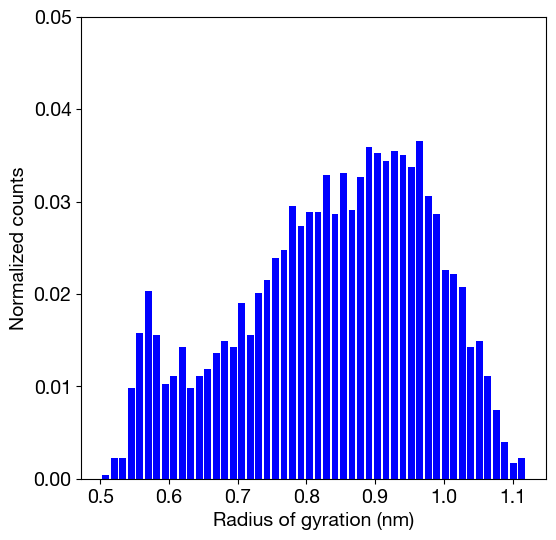

In [4]:
# Reading the data from the single file
data = read_data_xvg("./gyr_all.xvg")
# Extracting the second column
column = data[:, 1]

fig = plt.figure(figsize=(6 ,6) ,facecolor='w')
# Plotting a histogram of the column with 20 bins, normalized counts and separation
plt.hist(column ,bins=50 ,weights=np.ones(len(column))/len(column) ,color="blue", rwidth=0.8)
# Adding labels
plt.ylim(0, 0.05)
plt.xlabel("Radius of gyration (nm)")
plt.ylabel("Normalized counts")
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_gyr.png" ,dpi=300)

GYRATION CLUSTERS

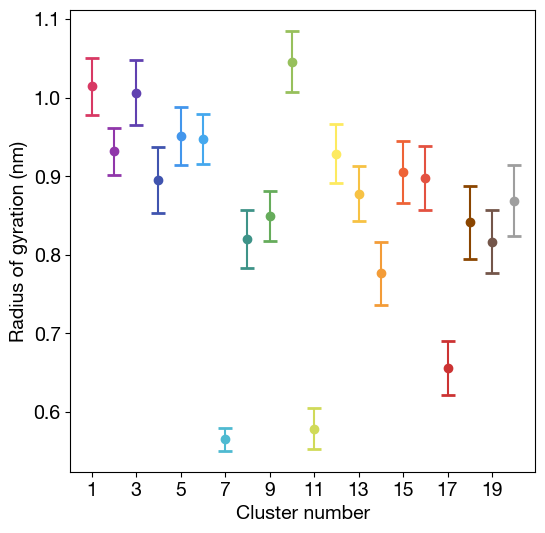

In [5]:
# Initializing empty lists to store the averages and standard deviations
averages = []
stds = []

# Looping over the 20 files
for i in range(1, 21):
    # Formatting the file name with leading zeros
    filename = f"./clusters_gromacs/clusters_20/gyr_cl{i:03d}.xvg"
    # Reading the data from the file
    data = read_data_xvg(filename)
    # Extracting the second column
    column = data[:, 1]
    # Calculating the average and standard deviation of the column
    average = column.mean()
    std = column.std()
    # Appending them to the lists
    averages.append(average)
    stds.append(std)

fig = plt.figure(figsize=(6, 6), facecolor='w')
# Plotting the averages with error bars using standard deviations
for i in range(1 ,21):
    plt.errorbar(i, averages[i-1], yerr=stds[i-1], fmt="o", capsize=5, capthick=2, color=colors_rgb[i-1])
# Adding labels
plt.xlabel("Cluster number")
plt.ylabel("Radius of gyration (nm)")
plt.xticks(range(1, 21,2))
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("gyr_clusters.png", dpi=300)

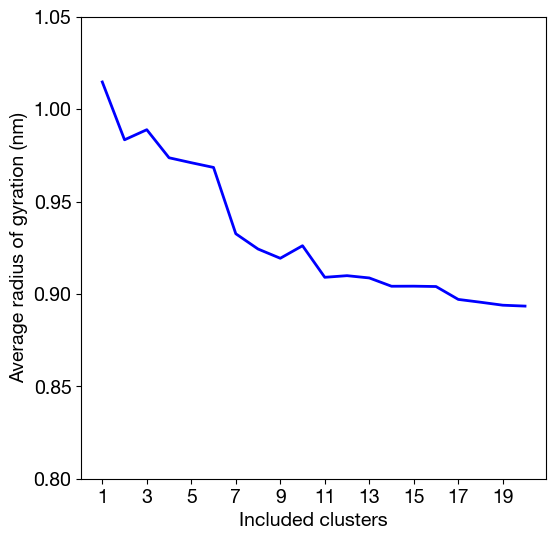

In [6]:
fig = plt.figure(figsize=(6, 6), facecolor='w')

data = averages

def file_to_list_of_lists(filename):
    with open(filename, 'r') as f:
        data = []
        for line in f:
            row = line.strip().split('\t')
            if not all(val == '' for val in row):
                data.append([float(val) if val != '' else None for val in row])
    return data

weights = file_to_list_of_lists("weights.txt")

weighted_averages = []

for i in range(len(weights)):
    new_weights = weights[i]
    new_data = data[:i+1]
    weighted_average = sum([new_data[j]*new_weights[j] for j in range(len(new_data))]) / sum(new_weights)
    weighted_averages.append(weighted_average)

x = np.arange(len(weights))

plt.plot(x+1, weighted_averages, color="blue", linewidth=2)

# Adding labels
plt.ylim(0.8,1.05)
plt.xticks(range(1, 21,2))
plt.xlabel("Included clusters")
plt.ylabel("Average radius of gyration (nm)")

# Saving the plot as an image file with 300 dpi resolution
plt.savefig("gyr_clusters_convergence.png", dpi=300)

RMSD ENSEMBLE

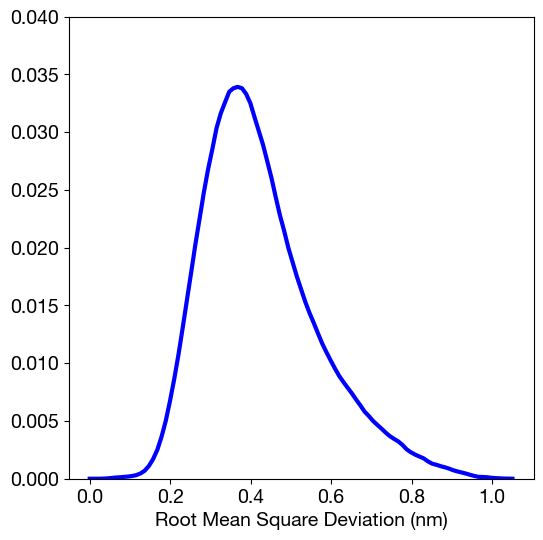

In [7]:
# Reading the data from the single file
data = read_data_xvg("./clusters_gromacs/rmsd-dist.xvg")
# Extracting the columns
x = data[:, 0]
height = data[:, 1]
height_norm = height/np.sum(height)
fig = plt.figure(figsize=(6 ,6) ,facecolor='w')
# Plotting a histogram
plt.plot(x, height_norm, linewidth=3.0, color='blue')
# Adding labels
plt.ylim(0, 0.04)
plt.xlabel("Root Mean Square Deviation (nm)")
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_rmsd.png" ,dpi=300)

PLOT CLUSTER POPULATIONS

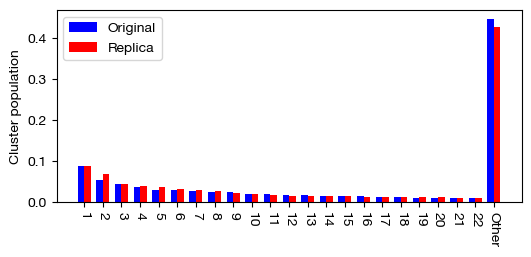

In [8]:
plt.rcParams["font.size"] = 10

def read_data(file_name):
    data = {}
    with open(file_name, 'r') as f:
        for line in f.readlines():
            key, value = line.strip().split()
            data[key] = float(value)
    return data

def plot_data(data1, data2):
    labels = list(data1.keys())
    values1 = list(data1.values())
    values2 = list(data2.values())

    x = list(range(len(labels)))
    width = 0.35

    fig, ax = plt.subplots(figsize=(6, 2.5), facecolor='w')
    ax.bar([i - width/2 for i in x], values1, width, label='Original', color="blue")
    ax.bar([i + width/2 for i in x], values2, width, label='Replica', color="red")

    plt.ylabel("Cluster population")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=-90)
    ax.legend()
    # Saving the plot as an image file with 300 dpi resolution
    plt.savefig("compare_pop.png", dpi=300)

data1 = read_data('./clusters_gromacs/cluster_2.0.dat')
data2 = read_data('./REVISION_ChemSci/REST_from_allcoil/0/bp1_allcoil_clusters/cluster.dat')
plot_data(data1, data2)

GYRATION OVER HIP ENSEMBLE

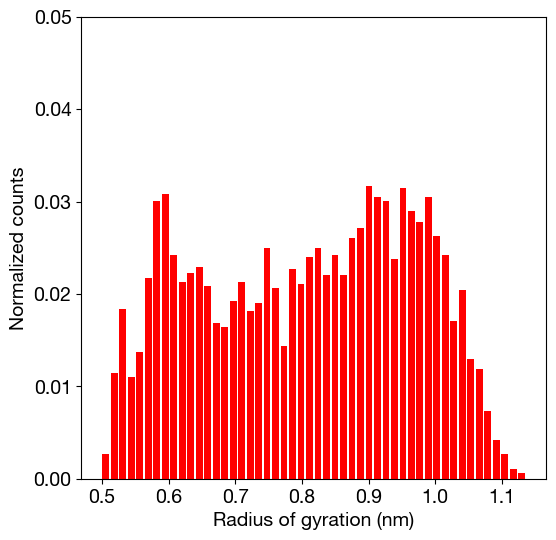

In [9]:
plt.rcParams["font.size"] = 14

# Reading the data from the single file
data = read_data_xvg("./REVISION_ChemSci/REST_allcharged/REST/0/gyration.xvg")
# Extracting the second column
column = data[:, 1]

fig = plt.figure(figsize=(6 ,6) ,facecolor='w')
# Plotting a histogram of the column with 20 bins, normalized counts and separation
plt.hist(column ,bins=50 ,weights=np.ones(len(column))/len(column) ,color="red", rwidth=0.8)
# Adding labels
plt.ylim(0, 0.05)
plt.xlabel("Radius of gyration (nm)")
plt.ylabel("Normalized counts")
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_gyr_allcharged.png" ,dpi=300)

PLOT BOTH Rg DISTRIBUTIONS TOGETHER

0.8390077460595446
0.8077023336113427


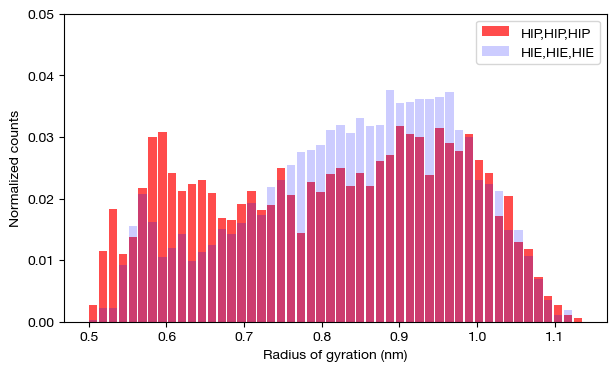

In [10]:
plt.rcParams["font.size"] = 10

# Reading the data from the single file
data = read_data_xvg("./gyr_all.xvg")
# Extracting the second column
column = data[:, 1]
mean_original = np.mean(column)
print(mean_original)

# Reading the data from the single file
data2 = read_data_xvg("./REVISION_ChemSci/REST_allcharged/REST/0/gyration.xvg")
# Extracting the second column
column2 = data2[:, 1]
mean_charged = np.mean(column2)
print(mean_charged)

# Calculate common bins
bins = np.linspace(min(min(column), min(column2)), max(max(column), max(column2)), 51)

fig, ax = plt.subplots(figsize=(7, 4), facecolor='w')

ax.hist(column2, bins=bins, weights=np.ones(len(column2))/len(column2), alpha=0.7, color="red", rwidth=0.85, label="HIP,HIP,HIP")
ax.hist(column, bins=bins, weights=np.ones(len(column))/len(column), alpha=0.2, color="blue", rwidth=0.85, label="HIE,HIE,HIE")

# Adding labels
plt.ylim(0, 0.05)
plt.xlabel("Radius of gyration (nm)")
plt.ylabel("Normalized counts")
plt.legend()
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_gyr_compare.png", dpi=300)

0.8390077460595446
0.8077023336113427


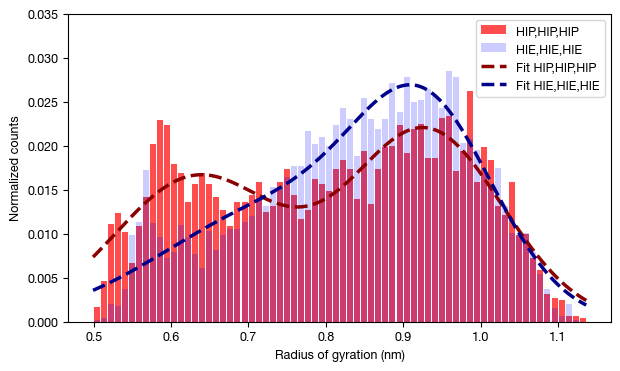

In [11]:
plt.rcParams["font.size"] = 9

# Define the Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Define the multi-peak Gaussian function
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp = params[i]
        mu = params[i + 1]
        sigma = params[i + 2]
        y += gaussian(x, amp, mu, sigma)
    return y

# Your existing code to read data and generate histograms
# Reading the data from the single file
data = read_data_xvg("./gyr_all.xvg")
# Extracting the second column
column = data[:, 1]
mean_original = np.mean(column)
print(mean_original)

# Reading the data from the single file
data2 = read_data_xvg("./REVISION_ChemSci/REST_allcharged/REST/0/gyration.xvg")
# Extracting the second column
column2 = data2[:, 1]
mean_charged = np.mean(column2)
print(mean_charged)

# Calculate common bins
bins = np.linspace(min(min(column), min(column2)), max(max(column), max(column2)), 71)

fig, ax = plt.subplots(figsize=(7, 4), facecolor='w')

ax.hist(column2, bins=bins, weights=np.ones(len(column2))/len(column2), alpha=0.7, color="red", rwidth=0.85, label="HIP,HIP,HIP")
ax.hist(column, bins=bins, weights=np.ones(len(column))/len(column), alpha=0.2, color="blue", rwidth=0.85, label="HIE,HIE,HIE")

# Fit the multi-peak Gaussian to the histograms
hist1, edges1 = np.histogram(column2, bins=bins, weights=np.ones(len(column2)) / len(column2))
hist2, edges2 = np.histogram(column, bins=bins, weights=np.ones(len(column)) / len(column))
centers = (edges1[:-1] + edges1[1:]) / 2

# Provide initial estimates for the curve_fit function
# Example: [amplitude1, mean1, sigma1, amplitude2, mean2, sigma2, ...]
amp1 = max(hist1)
mean1 = np.mean(column2)
sigma1 = np.std(column2)

amp2 = max(hist2)
mean2 = np.mean(column)
sigma2 = np.std(column)

initial_estimates = [amp1, mean1, sigma1, amp2, mean2, sigma2]

# Optimize the parameters using curve_fit
popt, pcov = curve_fit(multi_gaussian, centers, hist1, p0=initial_estimates)

# Plot the multi-peak Gaussian fit
fit_x = np.linspace(min(min(column), min(column2)), max(max(column), max(column2)), 1000)
fit_y = multi_gaussian(fit_x, *popt)
ax.plot(fit_x, fit_y, color="darkred", linewidth=2.5, linestyle="--", label="Fit HIP,HIP,HIP")

# Optimize the parameters using curve_fit for the second histogram
popt2, pcov2 = curve_fit(multi_gaussian, centers, hist2, p0=initial_estimates)

# Plot the multi-peak Gaussian fit for the second histogram
fit_y2 = multi_gaussian(fit_x, *popt2)
ax.plot(fit_x, fit_y2, color="darkblue", linewidth=2.5, linestyle="--", label="Fit HIE,HIE,HIE")

# Your existing code to add labels and save the plot
# Adding labels
plt.ylim(0, 0.035)
plt.xlabel("Radius of gyration (nm)")
plt.ylabel("Normalized counts")
plt.legend()
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_gyr_compare_fit.png", dpi=300)



CLUSTER POPS CHARGED

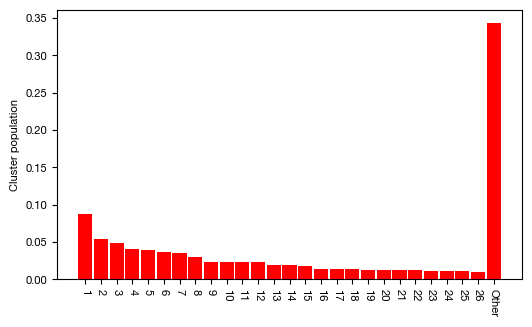

In [16]:
plt.rcParams["font.size"] = 8

def read_data(file_name):
    data = {}
    with open(file_name, 'r') as f:
        for line in f.readlines():
            key, value = line.strip().split()
            data[key] = float(value)
    return data

data = read_data('./REVISION_ChemSci/REST_allcharged/REST/0/clusters/cluster.dat')

labels = list(data.keys())
values1 = list(data.values())

x = list(range(len(labels)))
width = 0.9

fig, ax = plt.subplots(figsize=(6, 3.5), facecolor='w')
ax.bar([i for i in x], values1, width, color="red")

plt.ylabel("Cluster population")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xticks(rotation=-90)
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("pop_allcharged.png", dpi=300)

GYRATION ORIGINAL vs FROM COIL

0.8390077460595446
0.8556035500749873


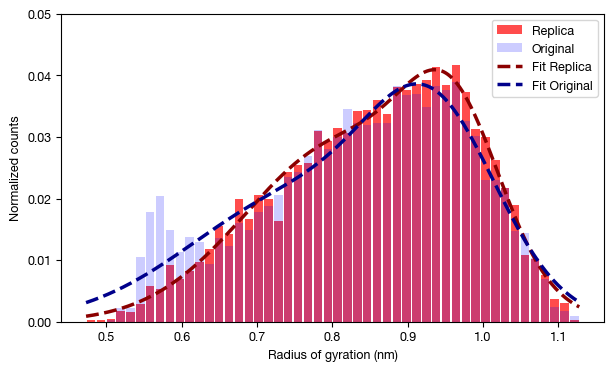

In [10]:
plt.rcParams["font.size"] = 9

# Define the Gaussian function
def gaussian(x, amp, mu, sigma):
    return amp * np.exp(-0.5 * ((x - mu) / sigma)**2)

# Define the multi-peak Gaussian function
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amp = params[i]
        mu = params[i + 1]
        sigma = params[i + 2]
        y += gaussian(x, amp, mu, sigma)
    return y

# Your existing code to read data and generate histograms
# Reading the data from the single file
data = read_data_xvg("./gyr_all.xvg")
# Extracting the second column
column = data[:, 1]
mean_original = np.mean(column)
print(mean_original)

# Reading the data from the single file
data2 = read_data_xvg("./REVISION_ChemSci/REST_from_allcoil/0/gyration.xvg")
# Extracting the second column
column2 = data2[:, 1]
mean_charged = np.mean(column2)
print(mean_charged)

# Calculate common bins
bins = np.linspace(min(min(column), min(column2)), max(max(column), max(column2)), 51)

fig, ax = plt.subplots(figsize=(7, 4), facecolor='w')

ax.hist(column2, bins=bins, weights=np.ones(len(column2))/len(column2), alpha=0.7, color="red", rwidth=0.85, label="Replica")
ax.hist(column, bins=bins, weights=np.ones(len(column))/len(column), alpha=0.2, color="blue", rwidth=0.85, label="Original")

# Fit the multi-peak Gaussian to the histograms
hist1, edges1 = np.histogram(column2, bins=bins, weights=np.ones(len(column2)) / len(column2))
hist2, edges2 = np.histogram(column, bins=bins, weights=np.ones(len(column)) / len(column))
centers = (edges1[:-1] + edges1[1:]) / 2

# Provide initial estimates for the curve_fit function
# Example: [amplitude1, mean1, sigma1, amplitude2, mean2, sigma2, ...]
amp1 = max(hist1)
mean1 = np.mean(column2)
sigma1 = np.std(column2)

amp2 = max(hist2)
mean2 = np.mean(column)
sigma2 = np.std(column)

initial_estimates = [amp1, mean1, sigma1, amp2, mean2, sigma2]

# Optimize the parameters using curve_fit
popt, pcov = curve_fit(multi_gaussian, centers, hist1, p0=initial_estimates)

# Plot the multi-peak Gaussian fit
fit_x = np.linspace(min(min(column), min(column2)), max(max(column), max(column2)), 1000)
fit_y = multi_gaussian(fit_x, *popt)
ax.plot(fit_x, fit_y, color="darkred", linewidth=2.5, linestyle="--", label="Fit Replica")

# Optimize the parameters using curve_fit for the second histogram
popt2, pcov2 = curve_fit(multi_gaussian, centers, hist2, p0=initial_estimates)

# Plot the multi-peak Gaussian fit for the second histogram
fit_y2 = multi_gaussian(fit_x, *popt2)
ax.plot(fit_x, fit_y2, color="darkblue", linewidth=2.5, linestyle="--", label="Fit Original")

# Your existing code to add labels and save the plot
# Adding labels
plt.ylim(0, 0.05)
plt.xlabel("Radius of gyration (nm)")
plt.ylabel("Normalized counts")
plt.legend()
# Saving the plot as an image file with 300 dpi resolution
plt.savefig("histogram_gyr_compare_fit_replica.png", dpi=300)